**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**We have collected air quality dataset from UCI machine learning repository**(https://archive.ics.uci.edu/ml/datasets/Air+Quality). 

**Pre-processed air quality dataset stored in csv file is loaded using pandas pd.read_csv() function.**

In [0]:
data = pd.read_csv('/content/drive/Shared drives/CMPE 295A-Final Project/Datasets/Final_Preprocessed_Data.csv')

In [0]:
l=data['labels']

In [0]:
X=data.to_numpy()
Y=l.to_numpy()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import itertools

**SVM**

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
kf = KFold(n_splits=2)
kf.get_n_splits(X)
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

#print(kf)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
    # fitting the model for grid search 
    grid.fit(x_train, y_train) 

   
    # print best parameter after tuning 
    #print(grid.best_params_) 
  
    # print how our model looks after hyper-parameter tuning 
    print(grid.best_estimator_) 




Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.623, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.623, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.623, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.623, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.624, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.624, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.6min finished


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ValueError: ignored

In [23]:
from sklearn.svm import SVC
kf = KFold(n_splits=3)
kf.get_n_splits(X)
 

#print(kf)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    print(cm_lr)





Accuracy of classification : 94.4212888746393 %
f1_score of classification : 94.10264735720675 %
[[1835  174]
 [   0 1110]]
Accuracy of classification : 96.98621352997756 %
f1_score of classification : 96.77567856951185 %
[[1911   38]
 [  56 1114]]
Accuracy of classification : 78.74318691888426 %
f1_score of classification : 78.16393010546776 %
[[1482  643]
 [  20  974]]


In [15]:
from sklearn.svm import SVC
kf = KFold(n_splits=5)
kf.get_n_splits(X)
 

#print(kf)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    print(cm_lr)





Accuracy of classification : 93.21581196581197 %
f1_score of classification : 92.91618782066047 %
[[1065  123]
 [   4  680]]
Accuracy of classification : 97.70299145299145 %
f1_score of classification : 97.41689945142487 %
[[1226   40]
 [   3  603]]
Accuracy of classification : 97.70176376269374 %
f1_score of classification : 97.5441434813864 %
[[1151   16]
 [  27  677]]
Accuracy of classification : 95.83110636023517 %
f1_score of classification : 95.74041946089329 %
[[1033   73]
 [   5  760]]
Accuracy of classification : 92.25013361838589 %
f1_score of classification : 90.89417615948676 %
[[1224  132]
 [  13  502]]


In [38]:
from sklearn.svm import SVC
kf = KFold(n_splits=7)
kf.get_n_splits(X)
 

#print(kf)
average_accuracy=0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    average_accuracy=average_accuracy+acc_lr
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    print(cm_lr)
average_accuracy=average_accuracy/7
print(average_accuracy)



Accuracy of classification : 96.55946148092744 %
f1_score of classification : 96.38837081475704 %
[[791  43]
 [  3 500]]
Accuracy of classification : 97.30740463724757 %
f1_score of classification : 97.00156985871273 %
[[864  34]
 [  2 437]]
Accuracy of classification : 98.20493642483171 %
f1_score of classification : 97.70708283313326 %
[[968   7]
 [ 17 345]]
Accuracy of classification : 97.83096484667165 %
f1_score of classification : 97.69025340909971 %
[[819   8]
 [ 21 489]]
Accuracy of classification : 97.15781600598355 %
f1_score of classification : 97.15777625613691 %
[[652  29]
 [  9 647]]
Accuracy of classification : 99.10179640718563 %
f1_score of classification : 98.96866894478981 %
[[902  10]
 [  2 422]]
Accuracy of classification : 94.98502994011976 %
f1_score of classification : 94.0272414692751 %
[[902  54]
 [ 13 367]]
0.9730677282042391


**KNN**

9


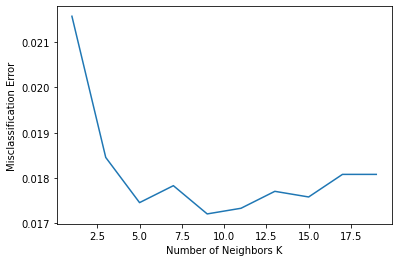

IndexError: ignored

In [33]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=7)
kf.get_n_splits(X)
#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,20) if x % 2 != 0]
# empty list that will hold cv scores
cv_scores = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    #graphical view
    #misclassification error
    MSE = [1-x for x in cv_scores]
    #optimal K
    optimal_k_index = MSE.index(min(MSE))
    optimal_k = neighbors[optimal_k_index]
    print(optimal_k)
    # plot misclassification error vs k
    plt.plot(neighbors, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=2)
kf.get_n_splits(X)

leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object


for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    knn_2 = KNeighborsClassifier()
    #Use GridSearch
    clf = GridSearchCV(knn_2, hyperparameters, cv=10)
    print(clf)
    best_model = clf.fit(x_train,y_train)
    #Print The value of best Hyperparameters
    print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
    print('Best p:', best_model.best_estimator_.get_params()['p'])
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best leaf_size: 1
Best p: 2
Best n_neighbors: 9
GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=No

In [40]:
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=7)
kf.get_n_splits(X)

#print(kf)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = KNeighborsClassifier(n_neighbors=9, leaf_size=1,p=2)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    print(cm_lr)

Accuracy of classification : 97.4569932685116 %
f1_score of classification : 97.32311526303641 %
[[801  33]
 [  1 502]]
Accuracy of classification : 97.90575916230367 %
f1_score of classification : 97.66036698165092 %
[[871  27]
 [  1 438]]
Accuracy of classification : 98.87808526551981 %
f1_score of classification : 98.56307941646193 %
[[974   1]
 [ 14 348]]
Accuracy of classification : 98.05534779356769 %
f1_score of classification : 97.93481618782823 %
[[817  10]
 [ 16 494]]
Accuracy of classification : 98.20493642483171 %
f1_score of classification : 98.2044050496911 %
[[668  13]
 [ 11 645]]
Accuracy of classification : 99.62574850299401 %
f1_score of classification : 99.56785431256165 %
[[910   2]
 [  3 421]]
Accuracy of classification : 98.20359281437125 %
f1_score of classification : 97.74973050664751 %
[[956   0]
 [ 24 356]]


**Logisitic Regression**

In [36]:
import numpy as np
from sklearn.model_selection import KFold
average_accuracy=0
kf = KFold(n_splits=3)
kf.get_n_splits(X)

#print(kf)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred, average='macro')
    print("Accuracy of classification : {0} %".format(acc_lr*100))
    print("f1_score of classification : {0} %".format(score*100))
    average_accuracy=average_accuracy+acc_lr
    print(cm_lr)
average_accuracy=average_accuracy/3
print(average_accuracy)

Accuracy of classification : 99.96793844180827 %
f1_score of classification : 99.96504051836426 %
[[2008    1]
 [   0 1110]]
Accuracy of classification : 100.0 %
f1_score of classification : 100.0 %
[[1949    0]
 [   0 1170]]
Accuracy of classification : 98.14042962487977 %
f1_score of classification : 97.8822650733297 %
[[2075   50]
 [   8  986]]
0.9936945602222934
